In [7]:
import numpy as np
import pandas as pd
import random as rd
from statistics import mean


In [8]:
data = pd.read_csv('model_results/normative_res_one_0_process_models_only_1kbest.csv')
# main_data_formatted = main_data_formatted.query("prior_resp != 's'")
# main_data_formatted = main_data_formatted.reset_index(drop=True)
# # main_data_formatted = main_data_formatted.query("rule_name == 'Zeta' or rule_name == 'Upsilon' or rule_name == 'Iota' or rule_name == 'Kappa' or rule_name == 'Omega'")
# # main_data_formatted = main_data_formatted.reset_index(drop=True)
# print(len(main_data_formatted['prior']))
# # main_data_formatted.to_csv('main_data_formatted_cond3_exp_trst_cut.csv'')

In [32]:
# subj similiarity 
subj_prior = list(data['prior'])
subj_prior = [eval(i) for i in subj_prior]
subj_prior = [i for sublist in subj_prior for i in sublist]

subj_post = list(data['posterior'])
subj_post = [eval(i) for i in subj_post]
subj_post = [i for sublist in subj_post for i in sublist]

similiarity_counts = [prior and post or not prior and not post for prior, post in zip(subj_prior,subj_post)]
similiaritys = sum(similiarity_counts) / len(similiarity_counts)
print(similiaritys)
print(mean(similiarity_counts))
from statistics import stdev
print(stdev(similiarity_counts))

similiarity_r = []

# count = 0
# intermediate_count = []
# for i in similiarity:
#     intermediate_count.append(i)
#     if len(intermediate_count) == 8:
#         similiarity_r.append(mean(intermediate_count))
#         intermediate_count = []

# print(len(similiarity_r))
# print(stdev(similiarity_r))
# print(mean(similiarity_short))
# # similiaritys = sum(similiarityr) / len(similiarityr)
# print(similiaritys)

0.8069556451612904
0.8069556451612904
0.3947870169506411


In [24]:
# model similiarity 
from statistics import mean, stdev
mod_prior = list(data['raw_probs_all_subjects_prior'])
mod_prior = [eval(i) for i in mod_prior]
mod_prior = mod_prior[0]
mod_post = [np.random.choice([True,False],p=[i,1-i]) for i in mod_prior]

mod_post = list(data['raw_probs_all_subjects_post_all'])
mod_post = [eval(i) for i in mod_post]
mod_post = mod_post[0]
mod_post = [np.random.choice([True,False],p=[i,1-i]) for i in mod_post]


similiarity1 = [prior and post or not prior and not post for prior, post in zip(mod_prior,mod_post)]
similiarity = sum(similiarity1) / len(similiarity1)
sim_num = []
for i in similiarity1:
    if i == True:
        sim_num.append(1)
    else:
        sim_num.append(0)
print(similiarity)
print(stdev(sim_num))
print(mean(sim_num))
# similiarity_percentages =  [1 if i == True else 0 for i in similiarity1]
# similiarity_short = []


# count = 0
# similarity_short = []
# intermediate_count = []
# for i in similiarity_percentages:
#     intermediate_count.append(i)
#     if len(intermediate_count) == 8:
#         similiarity_short.append(mean(intermediate_count))
#         intermediate_count = []

# # print(similiarity_short)
# print(mean(similiarity_short))


0.514616935483871
0.4999123013714658
0.514616935483871


In [87]:
# descriptives 
#
print(stdev(similiarity_short))
print(stdev(similiarity_r))
print(stdev(data['prior_accuracy']))
print(stdev(data['posterior_accuracy']))
print(mean(data['posterior_accuracy']))
# statistics t(data['prior_accuracy'], data['posterior_accuracy'])

0.29885507265342115
0.1559247148683072
0.21837915351804765
0.2229221080085453
0.6939655172413793


['Init. acc. subj.', 'Rev. acc. subj.', 'Union: subj.', 'Union: model']
[0.7025862068965517, 0.6939655172413793, 0.9109195402298851, 0.6163793103448276]
[0.023412702783396598, 0.023899758628842614, 0.016716884130132118, 0.03204062694915927]


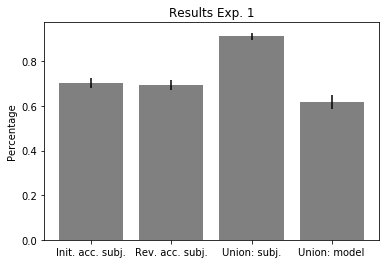

In [91]:
# normality checks 
# from matplotlib import pyplot as plt
# %matplotlib inline
# plot_data = pd.DataFrame({'means': [mean(data['prior_accuracy']), mean(data['posterior_accuracy']),mean(data['match_perc']),mean(similiarity_percentages)]},
# #                         index=["Init. Accuracy", "Rev. Accuracy", "Union"])

# # plot_data['means'].plot(kind='Bar')
# plt.xticks(rotation=0)
# plt.errorbar(, y, xerr=0.2, yerr=0.4)
# plt.ylabel("Percentage")
# plt.savefig('model_res_pdfs/c1_empirical_res.pdf')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
# if using a Jupyter notebook, include:
%matplotlib inline

x = ["Init. acc. subj.", "Rev. acc. subj.", "Union: subj.", "Union: model"]
y = [mean(data['prior_accuracy']),mean(data['posterior_accuracy']),mean(similiarity_r),mean(similiarity_short)]
yerr = [sem(data['prior_accuracy']), sem(data['posterior_accuracy']),sem(similiarity_r),sem(similiarity_short)]

print(x)
print(y)
print(yerr)
fig, ax = plt.subplots()


ax.bar(x, y,
            yerr=yerr, color='grey')


ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('Results Exp. 1')



plt.savefig('model_res_pdfs/c3_empirical_res.pdf')
plt.show()






In [39]:
# nonparametric t test 
from scipy.stats import wilcoxon
# accuracy 
# wilcoxon(data['prior_accuracy'],data['posterior_accuracy'])

# union
# print(len(similiarity))
print(len(sim_num))
print(len(similiarity_counts))
print(mean(sim_num))
print(mean(similiarity_counts))
# print(len(similiarity))
# print(wilcoxon(data['prior_accuracy'],data['posterior_accuracy']))
# print(mean(data['prior_accuracy']))
# print(mean(data['posterior_accuracy']))
print(wilcoxon(similiarity_counts,sim_num))

1984
1984
0.514616935483871
0.8069556451612904
WilcoxonResult(statistic=105105.0, pvalue=3.8805980588272163e-75)


['Init. rule subj.', 'Rev. label Norm.', 'Tree regrowing', 'Tree Surgery']
[0.10357, 0.10357, 0.1037, 0.11062]


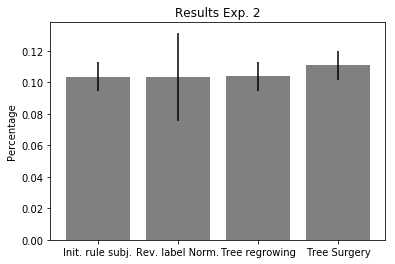

In [87]:
# correct rule percentage 
x = ["Init. rule subj.", "Rev. label Norm.", "Tree regrowing", "Tree Surgery"]
y = [0.10357,0.3454,0.1037,0.11062]#cond1
y = [0.10357,0.10357,0.1037,0.11062]#cond1
# y = [0.11805555555555555,0.3847,0.11827083333333333,0.12478472222222223]# cond2
# y = [0.09195402298850575,0.2002,0.08625287356321838,0.09235632183908046]#cond3
yerr = [0.009121068788135801, 0.027856888688947423, 0.009106819642643,0.009059906756188995]#cond1
# yerr = [0.026983346503309316, 0.0398829115603547, 0.02697526713095035,0.02661619488482699]#cond2
# yerr = [0.031159469919054373,0.041378110317774,0.029464063524890304,0.02864096236529486]#cond3



print(x)
print(y)
# print(yerr)
fig, ax = plt.subplots()


ax.bar(x, y,yerr=yerr, color='grey')


ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('Results Exp. 2')

# plt.savefig('model_res_pdfs/c3_corr_perct.pdf')
plt.show()


In [94]:
c = data['correct_rule_perc_post_all']
print(mean(data['correct_rule_perc_post_all'])/2000)
c = [i/2000 for i in c]
print(sem(c))

0.20025287356321841
0.041378110317774


In [3]:
# check if exp or trust mod acc improve in cond two
from statistics import mean,stdev, median, mode
from scipy.stats import ttest_ind, sem
from scipy.stats import wilcoxon
data = main_data_formatted
expertise = data['expertise_q']
trustworthy = data['trustworthy_q']
print(median(expertise))
init_acc = data['prior_accuracy']
rev_acc = data['posterior_accuracy']
low_ex_acc_init = []
high_ex_acc_init = []
low_ex_acc_rev = []
high_ex_acc_rev = []
ind = 0
for a in expertise:
    if a > 9:
        high_ex_acc_init.append(init_acc[ind])
        high_ex_acc_rev.append(rev_acc[ind])
    elif a <=9:
        low_ex_acc_init.append(init_acc[ind])
        low_ex_acc_rev.append(rev_acc[ind])
        
    ind+=1

print(len(low_ex_acc_init))
print(len(low_ex_acc_rev))
print(len(high_ex_acc_init))
print(len(high_ex_acc_rev))

        
print(mean(low_ex_acc_init))
print(mean(low_ex_acc_rev))
print(mean(high_ex_acc_init))
print(mean(high_ex_acc_rev))
print(sem(low_ex_acc_init))
print(sem(low_ex_acc_rev))
print(sem(high_ex_acc_init))
print(sem(high_ex_acc_rev))

print(wilcoxon(low_ex_acc_init,low_ex_acc_rev ))
print(wilcoxon(high_ex_acc_init,high_ex_acc_rev ))


NameError: name 'main_data_formatted' is not defined

['init_acc_l_t', 'rev_acc_l_t', 'init_acc_h_t', 'rev_acc_h_t']
[0.725, 0.721875, 0.70703125, 0.748046875]
[0.023258148157069652, 0.023843399791296436, 0.030651353001918433, 0.02776893596104255]


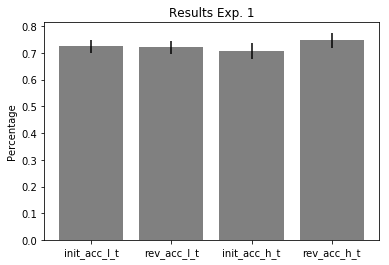

In [2]:
# normality checks 
# from matplotlib import pyplot as plt
# %matplotlib inline
# plot_data = pd.DataFrame({'means': [mean(data['prior_accuracy']), mean(data['posterior_accuracy']),mean(data['match_perc']),mean(similiarity_percentages)]},
# #                         index=["Init. Accuracy", "Rev. Accuracy", "Union"])

# # plot_data['means'].plot(kind='Bar')
# plt.xticks(rotation=0)
# plt.errorbar(, y, xerr=0.2, yerr=0.4)
# plt.ylabel("Percentage")
# plt.savefig('model_res_pdfs/c1_empirical_res.pdf')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
# if using a Jupyter notebook, include:
%matplotlib inline

x = ["init_acc_l_t", "rev_acc_l_t", "init_acc_h_t", "rev_acc_h_t"]
y = [0.7250,.721875,0.70703125,0.748046875]
yerr = [0.023258148157069652, 0.023843399791296436,0.030651353001918433,0.02776893596104255]

print(x)
print(y)
print(yerr)
fig, ax = plt.subplots()


ax.bar(x, y,
            yerr=yerr, color='grey')


ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('Results Exp. 1')



plt.savefig('model_res_pdfs/c2_empirical_res_ms.pdf')
plt.show()






In [56]:
init_deriv = [0.00010288065833333334, 0.000925925925925926, 1.587664482040339e-08, 5.29221493484225e-09, 0.000925925925925926, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 2.857796067672611e-07, 0.00010288065833333334, 0.00030864197530864197, 0.000925925925925926, 1.512407103007043e-16, 1.361166394067506e-15, 2.857796067672611e-07, 9.525986882716047e-08, 2.45009950932151e-13, 0.00010288065833333334, 1.7640716431833446e-09, 2.381496720679012e-08, 1.3611663940675058e-14, 0.00010288065833333334, 0.00010288065833333334, 0.0002314814814814815, 0.00010288065833333334, 2.857796067672611e-07, 0.00030864197530864197, 1.764071644947416e-10, 0.00010288065833333334, 0.001851851851851852, 1.2250497546607553e-13, 1.4700597055929063e-12, 5.292214940134463e-10, 0.000925925925925926, 7.144490169181526e-08, 7.144490162037036e-08, 7.144490162037036e-08, 8.166998364405036e-13, 0.00010288065833333334, 8.573388203017832e-07, 1.3230537350336157e-10, 0.00010288065833333334, 2.5720164583333332e-05, 8.573388203017832e-07, 1.5876644804526746e-08, 0.00010288065833333334, 9.525986882716047e-08, 0.00020576131666666665, 9.525986882716047e-08, 5.292214934842248e-09, 5.880238816491386e-11, 1.764071644947416e-10, 2.2050895583893595e-11, 1.8905088768682962e-16, 3.6751492566319675e-12, 9.525986882716047e-08, 1.764071644947416e-10, 5.880238816491386e-11, 8.573388203017832e-07, 1.587664482040339e-09, 0.000925925925925926, 2.161075535846828e-23, 1.3611663940675058e-14, 1.7640716431833446e-09, 3.024814199964459e-14, 0.00030864197530864197, 0.00010288065833333334, 2.857796067672611e-07, 0.00010288065833333334, 2.1433470507544582e-07, 0.000925925925925926, 1.3230537350336157e-10, 0.00010288065833333334, 0.00010288065833333334, 4.900199013742821e-13, 0.00010288065833333334, 1.512407103007043e-16, 1.7640716431833446e-09, 3.024814199964459e-14, 1.225049754660755e-13, 1.7640716431833446e-09, 1.7640716431833446e-09, 1.7640716431833446e-09, 1.7640716431833446e-09, 0.00010288065833333334, 2.381496720679012e-08, 8.573388203017832e-07, 0.00030864197530864197, 0.000925925925925926, 3.024814199964459e-14, 0.00010288065833333334, 0.00010288065833333334, 5.292214934842248e-09, 0.00010288065833333334, 4.2866941015089163e-07, 3.024814199964459e-14, 0.0002314814814814815, 0.00010288065833333334, 0.00010288065833333334, 2.857796067672611e-07, 5.1440329218107e-06, 5.953741807651272e-10, 0.000925925925925926, 1.4288980338363054e-07, 0.00010288065833333334, 4.537221309021131e-15, 0.00010288065833333334, 2.857796067672611e-07, 0.00030864197530864197, 8.166998364405036e-13, 4.762993446121017e-08, 3.9691612051008474e-10, 9.452544384341481e-17, 0.000925925925925926, 0.00010288065833333334, 1.9845806025504237e-10, 0.0006944444444444445, 1.7640716431833446e-09, 8.573388203017832e-07, 9.525986882716047e-08, 0.000925925925925926, 2.381496720679012e-08, 1.9051973746380125e-06, 0.00010288065833333334, 0.0002314814814814815, 0.00010288065833333334, 0.00030864197530864197, 0.00010288065833333334, 0.00030864197530864197, 2.857796067672611e-07, 5.671526641947941e-17, 7.144490162037036e-08, 0.00010288065833333334, 8.402261683372468e-18, 2.857796067672611e-07, 0.00010288065833333334, 4.900199008842623e-12, 1.4288980338363054e-07, 8.573388203017832e-07, 2.6791838134430724e-08, 1.4288980338363054e-07, 7.656560966629721e-15, 0.000925925925925926, 1.7640716431833446e-09, 1.7640716431833446e-09, 1.7640716431833446e-09, 3.024814199964459e-14, 1.7640716431833446e-09, 4.410179116778719e-11, 0.00010288065833333334, 1.7640716431833446e-09, 0.0002314814814814815, 1.587664482040339e-09, 7.350298520614236e-12, 6.430041152263374e-07, 4.822530864197531e-07, 0.000925925925925926, 8.573388203017832e-07, 0.000925925925925926, 1.7146776388888887e-05, 3.024814199964459e-14, 1.5876644804526746e-08, 0.00010288065833333334, 6.301696268831045e-18, 0.00010288065833333334, 2.857796067672611e-07, 2.5720164583333332e-05, 8.573388203017832e-07, 8.573388203017832e-07, 8.573388203017832e-07, 0.000925925925925926, 9.525986882716047e-08, 0.0002314814814814815, 1.587664482040339e-09, 3.6751492639822663e-13, 0.000925925925925926, 0.00010288065833333334, 2.1433470507544582e-07, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 3.175328960905349e-08, 0.0002314814814814815, 4.2866941015089163e-07, 1.7640716431833446e-09, 3.9691612051008474e-10, 0.00010288065833333334, 4.2866941015089163e-07, 8.573388203017832e-07, 8.573388203017832e-07, 0.000925925925925926, 8.573388203017832e-07, 0.00010288065833333334, 0.0002314814814814815, 0.000925925925925926, 4.900199013742824e-12, 4.900199013742824e-12, 1.6333996712476075e-12, 6.430041152263374e-07, 4.41017911236854e-11, 2.857796067672611e-07, 9.525986882716047e-08, 0.00030864197530864197, 0.000925925925925926, 7.716049375e-05, 0.001851851851851852, 2.2050895583893595e-11, 0.0002314814814814815, 2.857796067672611e-07, 1.587664482040339e-09, 0.00010288065833333334, 0.000925925925925926, 0.000925925925925926, 1.587664482040339e-09, 4.762993446121017e-08, 8.573388203017832e-07, 0.00010288065833333334, 0.0002314814814814815, 0.000925925925925926, 8.573388203017832e-07, 1.488435451912818e-10, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 2.857796067672611e-07, 0.00010288065833333334, 1.225049754660755e-13, 2.857796067672611e-07, 8.573388203017832e-07, 8.573388203017832e-07, 8.573388203017832e-07, 8.573388203017832e-07, 2.857796067672611e-07, 1.7640716431833446e-09, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 5.292214934842248e-09, 2.857796067672611e-07, 0.00010288065833333334, 2.381496720679012e-08, 0.00010288065833333334, 2.857796067672611e-07, 0.00030864197530864197, 0.0002314814814814815, 1.7640716431833446e-09, 3.9691612051008474e-10]
# print(mean(init_deriv))
# init_deriv = [np.log(i) for i in init_deriv]
rev_deriv = [0.00010288065833333334, 0.000925925925925926, 1.4700597055929065e-11, 2.2686106567791764e-16, 1.0, 0.00010288065833333334, 0.00010288065833333334, 2.381496720679012e-08, 2.857796067672611e-07, 0.00030864197530864197, 5.292214934842248e-09, 0.00010288065833333334, 2.3339615787145745e-20, 0.000925925925925926, 2.857796067672611e-07, 9.525986882716047e-08, 2.6461074700672315e-10, 0.00010288065833333334, 2.857796067672611e-07, 2.5720164583333332e-05, 2.857796067672611e-07, 0.00010288065833333334, 0.00010288065833333334, 0.0002314814814814815, 0.00010288065833333334, 2.857796067672611e-07, 0.00010288065833333334, 5.715592129629629e-07, 0.00010288065833333334, 1.587664482040339e-09, 1.2250497546607553e-13, 1.4700597055929063e-12, 0.000925925925925926, 0.00010288065833333334, 7.144490169181526e-08, 7.144490162037036e-08, 1.3230537323875085e-09, 9.525986882716047e-08, 0.00010288065833333334, 2.857796067672611e-07, 1.4288980338363054e-07, 0.00010288065833333334, 9.922903002829216e-10, 8.573388203017832e-07, 1.5876644804526746e-08, 0.00010288065833333334, 0.00030864197530864197, 0.00020576131666666665, 4.41017911236854e-11, 0.00010288065833333334, 1.6333996712476071e-13, 4.083499178119018e-14, 0.001851851851851852, 1.8905088768682962e-16, 3.6751492566319675e-12, 1.0716735253772291e-07, 1.7146776406035665e-06, 5.292214940134463e-10, 8.573388203017832e-07, 0.000925925925925926, 0.000925925925925926, 2.161075535846828e-23, 1.4700597055929065e-11, 1.4288980338363052e-07, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 2.857796067672611e-07, 0.00010288065833333334, 0.0002314814814814815, 0.000925925925925926, 1.3611663940675058e-14, 2.857796067672611e-07, 0.00010288065833333334, 5.1440329218107e-06, 0.00010288065833333334, 1.512407103007043e-16, 5.953741807651272e-10, 3.024814199964459e-14, 8.573388203017832e-07, 1.7640716431833446e-09, 1.7640716431833446e-09, 1.7640716431833446e-09, 1.7640716431833446e-09, 0.00010288065833333334, 0.0002314814814814815, 8.573388203017832e-07, 2.857796067672611e-07, 0.000925925925925926, 3.024814199964459e-14, 0.00010288065833333334, 2.857796067672611e-07, 4.762993441358024e-08, 0.00010288065833333334, 2.1433470507544582e-07, 3.024814199964459e-14, 0.0002314814814814815, 0.00030864197530864197, 2.857796067672611e-07, 0.00010288065833333334, 0.001851851851851852, 0.000925925925925926, 0.000925925925925926, 1.3230537350336157e-10, 0.00010288065833333334, 4.537221309021131e-15, 0.00010288065833333334, 2.857796067672611e-07, 3.500942371572803e-20, 8.166998364405036e-13, 4.900199013742824e-12, 1.3230537350336157e-10, 0.0002314814814814815, 2.857796067672611e-07, 0.00010288065833333334, 2.857796067672611e-07, 3.024814199964459e-14, 1.7640716431833446e-09, 8.573388203017832e-07, 9.525986882716047e-08, 0.00010288065833333334, 0.0002314814814814815, 0.00010288065833333334, 0.00010288065833333334, 0.0002314814814814815, 0.00010288065833333334, 3.9691612051008474e-10, 1.3230537350336157e-10, 0.00030864197530864197, 2.857796067672611e-07, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 0.0002314814814814815, 1.3611663940675058e-14, 1.7640716431833446e-09, 1.4288980338363054e-07, 1.4288980338363054e-07, 8.573388203017832e-07, 0.000925925925925926, 8.573388203017832e-07, 5.5127238959734e-12, 0.000925925925925926, 1.7640716431833446e-09, 1.7640716431833446e-09, 1.7640716431833446e-09, 3.024814199964459e-14, 1.7640716431833446e-09, 7.562035515035218e-16, 0.000925925925925926, 1.7640716431833446e-09, 0.0002314814814814815, 5.292214940134463e-10, 4.2866941015089163e-07, 0.000925925925925926, 0.0002314814814814815, 0.00010288065833333334, 1.3230537350336157e-10, 0.000925925925925926, 1.7146776388888887e-05, 3.024814199964459e-14, 1.5876644804526746e-08, 0.00010288065833333334, 6.805831970337529e-15, 0.00010288065833333334, 2.857796067672611e-07, 2.5720164583333332e-05, 8.573388203017832e-07, 8.573388203017832e-07, 8.573388203017832e-07, 0.000925925925925926, 1.225049754660755e-13, 2.625706773428189e-19, 4.410179116778719e-12, 3.9691612051008474e-10, 0.00010288065833333334, 0.00010288065833333334, 0.0002314814814814815, 0.00010288065833333334, 2.857796067672611e-07, 0.00010288065833333334, 7.938322410201695e-10, 0.0002314814814814815, 4.2866941015089163e-07, 1.7640716431833446e-09, 3.9691612051008474e-10, 0.00010288065833333334, 4.2866941015089163e-07, 8.573388203017832e-07, 8.573388203017832e-07, 0.000925925925925926, 8.573388203017832e-07, 0.00010288065833333334, 0.0002314814814814815, 0.000925925925925926, 4.900199013742824e-12, 4.900199013742824e-12, 4.41017911236854e-11, 3.9691612051008474e-10, 0.00010288065833333334, 2.857796067672611e-07, 0.000925925925925926, 0.00030864197530864197, 0.000925925925925926, 8.573388203017832e-07, 0.001851851851851852, 2.2050895583893595e-11, 0.0002314814814814815, 2.857796067672611e-07, 0.001851851851851852, 0.00010288065833333334, 1.3230537350336157e-10, 0.000925925925925926, 1.587664482040339e-09, 0.000925925925925926, 8.573388203017832e-07, 0.00010288065833333334, 0.0002314814814814815, 0.00010288065833333334, 2.857796067672611e-07, 0.0002314814814814815, 1.3230537350336157e-10, 0.00010288065833333334, 0.00010288065833333334, 2.857796067672611e-07, 0.00010288065833333334, 1.3230537350336157e-10, 2.857796067672611e-07, 0.000925925925925926, 7.350298527964533e-13, 8.573388203017832e-07, 8.573388203017832e-07, 2.857796067672611e-07, 1.7640716431833446e-09, 0.00010288065833333334, 1.225049754660755e-13, 0.00010288065833333334, 2.857796067672611e-07, 5.292214934842248e-09, 2.857796067672611e-07, 0.00010288065833333334, 0.0002314814814814815, 0.00010288065833333334, 2.5720164583333332e-05, 0.00030864197530864197, 0.0002314814814814815, 5.880238810611149e-10, 0.000462962962962963]
# print(mean(rev_deriv))
# rev_deriv = [np.log(i) for i in rev_deriv]


(array([204.,  20.,   0.,   1.,   0.,  21.,   0.,   0.,   0.,   2.]),
 array([2.16107554e-23, 1.85185185e-04, 3.70370370e-04, 5.55555556e-04,
        7.40740741e-04, 9.25925926e-04, 1.11111111e-03, 1.29629630e-03,
        1.48148148e-03, 1.66666667e-03, 1.85185185e-03]),
 <a list of 10 Patch objects>)

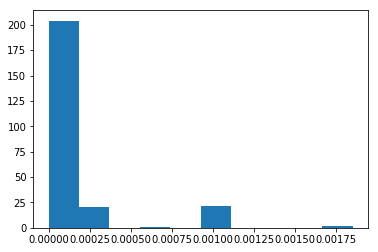

In [40]:
plt.hist(init_deriv)


(array([247.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.16107554e-23, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

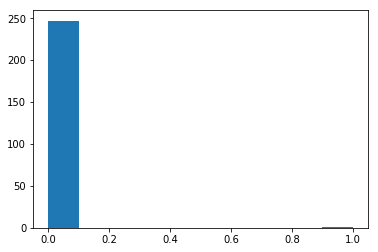

In [41]:
plt.hist(rev_deriv)

In [55]:
print(np.sum(init_deriv))
print(np.sum(rev_deriv))


-3917.595491027118
-3797.7602557139635


In [61]:
print(-3917.595491027118/248)
print(-3797.7602557139635/248)

-15.79675601220612
-15.313549418201466


['mean(-LogL_init_judg)', 'mean(-LogL_rev_judg)']
[15.79675601220612, 15.313549418201468]
[0.5198619393035707, 0.5372055643413192]


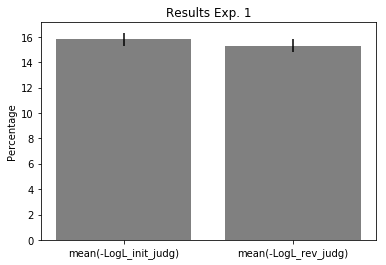

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
# if using a Jupyter notebook, include:
%matplotlib inline

x = ["mean(-LogL_init_judg)", "mean(-LogL_rev_judg)"]
y = [15.79675601220612,15.313549418201468]
yerr = [0.5198619393035707,0.5372055643413192]

print(x)
print(y)
print(yerr)
fig, ax = plt.subplots()


ax.bar(x, y,
            yerr=yerr, color='grey')


ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('Results Exp. 1')



plt.savefig('model_res_pdfs/c1_deriv_probs.pdf')
plt.show()




In [20]:
print(len(rev_deriv))

248


['tr_learner', 'ts_learner']
[1.078, 5.315]
[0.5198619393035707, 0.5372055643413192]


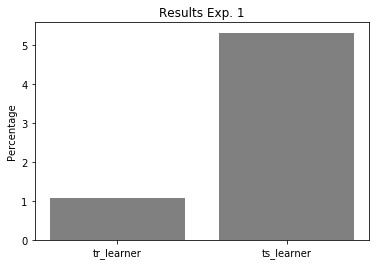

In [63]:
# check how often correct rule was found if changed
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
# if using a Jupyter notebook, include:
%matplotlib inline

x = ["tr_learner", "ts_learner"]
y = [1.078,5.315]
# yerr = [0.5198619393035707,0.5372055643413192]

print(x)
print(y)
print(yerr)
fig, ax = plt.subplots()


ax.bar(x, y,
           color='grey')


ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('Results Exp. 1')



plt.savefig('model_res_pdfs/c1_perc_corr_rule_found.pdf')
plt.show()




In [65]:
rev_prob_c2 = [1.9845806025504237e-10, 8.573388203017832e-07, 0.000925925925925926, 0.000925925925925926, 9.452544403246568e-18, 1.7146776388888887e-05, 0.00010288065833333334, 2.1433470507544582e-07, 0.000925925925925926, 0.00010288065833333334, 2.5720164583333332e-05, 1.587664482040339e-08, 2.2050895583893595e-11, 1.4288980338363054e-07, 2.20508955838936e-11, 0.0002314814814814815, 0.00010288065833333334, 1.7146776388888887e-05, 2.1433470507544582e-07, 0.0002314814814814815, 2.857796067672611e-07, 0.00010288065833333334, 4.083499182202518e-14, 0.00010288065833333334, 1.5951168680478586e-17, 0.0002314814814814815, 2.2050895583893595e-11, 1.2250497546607553e-13, 8.573388203017832e-07, 1.225049754660755e-13, 9.525986882716047e-08, 0.00010288065833333334, 8.573388203017832e-07, 1.4700597041228466e-11, 1.3611663940675058e-14, 2.126822490730478e-17, 1.9449679842071125e-21, 4.900199013742821e-12, 0.00010288065833333334, 0.000925925925925926, 0.0002314814814814815, 0.00010288065833333334, 1.587664482040339e-09, 7.562035522597254e-17, 0.000925925925925926, 0.000925925925925926, 2.2050895583893595e-11, 2.857796067672611e-07, 9.525986882716047e-08, 9.525986882716047e-08, 0.000925925925925926, 0.00010288065833333334, 0.0002314814814814815, 2.2050895583893595e-11, 0.000925925925925926, 6.805831970337529e-15, 0.0002314814814814815, 6.89090485618494e-13, 2.857796067672611e-07, 0.00010288065833333334, 1.5876644804526746e-08, 2.857796067672611e-07, 7.144490162037036e-08, 0.00010288065833333334, 0.00020576131666666665, 0.00010288065833333334, 0.00010288065833333334, 2.857796067672611e-07, 6.61526866855281e-11, 1.5876644804526746e-08, 4.762993441358024e-08, 1.4288980338363054e-07, 1.587664482040339e-09, 1.7640716431833446e-09, 3.8282804833148604e-15, 5.29221493484225e-09, 0.000925925925925926, 0.00010288065833333334, 0.000925925925925926, 8.573388203017832e-07, 1.7146776388888887e-05, 0.00010288065833333334, 0.0002314814814814815, 1.3230537350336157e-10, 0.00010288065833333334, 0.0002314814814814815, 0.00010288065833333334, 9.525986882716047e-08, 4.410179116778719e-11, 0.000925925925925926, 2.857796067672611e-07, 0.000925925925925926, 0.000925925925925926, 2.381496720679012e-08, 2.857796067672611e-07, 8.166998356238036e-14, 4.4653063557384543e-10, 1.323053735033616e-10, 1.9845806025504237e-10, 0.00010288065833333334, 2.857796067672611e-07, 0.00010288065833333334, 8.573388203017832e-07, 1.260339252505869e-17, 0.000925925925925926, 0.00010288065833333334, 2.857796067672611e-07, 2.857796067672611e-07, 1.512407103007043e-16, 1.7146776406035665e-06, 0.00010288065833333334, 0.00010288065833333334, 2.857796067672611e-07, 2.5720164583333332e-05, 0.00010288065833333334, 0.00030864197530864197, 9.525986882716047e-08, 5.953741807651272e-10, 0.0002314814814814815, 0.000925925925925926, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 1.4288980338363052e-07, 0.00010288065833333334, 1.7640716431833446e-09, 4.762993446121017e-08, 1.0716735253772291e-07]
init_prob_c2 = [1.9845806025504237e-10, 8.573388203017832e-07, 0.000925925925925926, 0.000925925925925926, 9.452544403246568e-18, 0.00030864197530864197, 0.00010288065833333334, 2.1433470507544582e-07, 0.00030864197530864197, 0.00010288065833333334, 2.5720164583333332e-05, 1.4288980338363054e-07, 2.2050895583893595e-11, 1.4288980338363054e-07, 2.20508955838936e-11, 0.0002314814814814815, 0.00010288065833333334, 8.269085835691013e-12, 0.0002314814814814815, 0.0002314814814814815, 2.857796067672611e-07, 0.00010288065833333334, 7.938322410201695e-10, 0.00010288065833333334, 4.4653063557384543e-10, 0.0002314814814814815, 2.2050895583893595e-11, 1.2250497546607553e-13, 8.573388203017832e-07, 1.225049754660755e-13, 9.525986882716047e-08, 0.00010288065833333334, 0.000925925925925926, 1.7640716431833446e-09, 1.4700597055929065e-11, 1.3611663940675058e-14, 4.410179116778719e-11, 4.900199013742821e-12, 0.00010288065833333334, 1.9051973765432097e-07, 0.0002314814814814815, 0.00010288065833333334, 1.225049754660755e-13, 7.562035522597254e-17, 0.000925925925925926, 0.000925925925925926, 2.2050895583893595e-11, 2.857796067672611e-07, 9.525986882716047e-08, 9.525986882716047e-08, 8.573388203017832e-07, 0.00010288065833333334, 0.0002314814814814815, 2.2050895583893595e-11, 0.000925925925925926, 6.805831970337529e-15, 0.0002314814814814815, 6.89090485618494e-13, 0.00010288065833333334, 0.00010288065833333334, 2.5720164583333332e-05, 2.1433470507544582e-07, 4.762993441358024e-08, 0.00010288065833333334, 2.286236849565615e-05, 8.573388203017832e-07, 0.00010288065833333334, 2.857796067672611e-07, 9.525986882716047e-08, 1.5876644804526746e-08, 1.5876644804526746e-08, 1.4288980338363054e-07, 1.587664482040339e-09, 1.7640716431833446e-09, 9.922903012752121e-11, 5.29221493484225e-09, 0.000925925925925926, 0.00010288065833333334, 0.000925925925925926, 8.573388203017832e-07, 2.857796067672611e-07, 0.00010288065833333334, 0.0002314814814814815, 1.3230537350336157e-10, 0.000925925925925926, 0.0002314814814814815, 0.00010288065833333334, 0.00010288065833333334, 4.410179116778719e-11, 0.000925925925925926, 2.857796067672611e-07, 0.000925925925925926, 0.000925925925925926, 2.381496720679012e-08, 2.857796067672611e-07, 8.166998356238036e-14, 4.4653063557384543e-10, 2.1433470507544582e-07, 1.9845806025504237e-10, 0.00010288065833333334, 2.857796067672611e-07, 0.00010288065833333334, 8.573388203017832e-07, 1.260339252505869e-17, 6.430041152263374e-07, 2.2050895583893595e-11, 2.857796067672611e-07, 4.537221313558353e-16, 1.512407103007043e-16, 1.4700597055929063e-12, 0.00010288065833333334, 0.00010288065833333334, 2.857796067672611e-07, 5.953741807651272e-10, 7.144490162037036e-08, 0.00030864197530864197, 9.525986882716047e-08, 5.953741807651272e-10, 0.0002314814814814815, 0.000925925925925926, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 0.00010288065833333334, 1.4288980338363052e-07, 0.00010288065833333334, 1.7640716431833446e-09, 4.762993446121017e-08, 2.2050895583893595e-11]
init_deriv_2 = [np.log(i) for i in init_prob_c2]
rev_deriv_2 = [np.log(i) for i in rev_prob_c2]

-15.743236257016854
-15.733086386334808
WilcoxonResult(statistic=306.5, pvalue=0.8892446335983476)


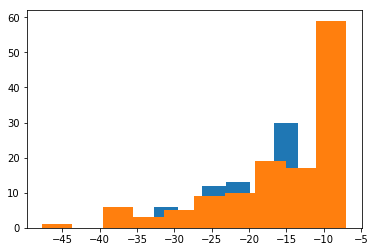

In [71]:
plt.hist(init_deriv_2)
plt.hist(rev_deriv_2)
print(mean(init_deriv_2))
print(mean(rev_deriv_2))
print(wilcoxon(init_deriv_2,rev_deriv_2))

['mean(-LogL_init_judg)', 'mean(-LogL_rev_judg)']
[15.743236257016854, 15.733086386334808]
[0.7102457467746514, 0.7793158205983908]


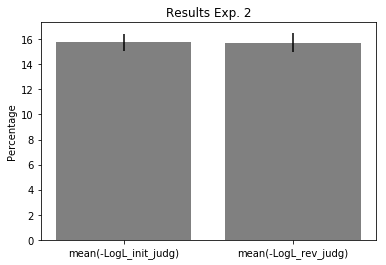

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
# if using a Jupyter notebook, include:
%matplotlib inline

x = ["mean(-LogL_init_judg)", "mean(-LogL_rev_judg)"]
y = [-mean(init_deriv_2),-mean(rev_deriv_2)]
yerr = [sem(init_deriv_2),sem(rev_deriv_2)]

print(x)
print(y)
print(yerr)
fig, ax = plt.subplots()


ax.bar(x, y,
            yerr=yerr, color='grey')


ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('Results Exp. 2')



plt.savefig('model_res_pdfs/c2_deriv_probs.pdf')
plt.show()




In [11]:
print(main_data_formatted['rules_post_all'][0])

["Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(x1,'blue','colour'),1,X)", "Z.exactly(lambda x1: Z.equal(

In [1]:
places = []

# open file and read the content in a list
with open('model_results/test6/rules_post_all.txt', 'r') as filehandle:
    filecontents = filehandle.readlines()

    for line in filecontents:
        # remove linebreak which is the last character of the string
        current_place = line[:-1]

        # add item to the list
        places.append(current_place)

In [4]:
for i in places:
    print(len(eval(i)))
    

2000
2000
2000
2000
2000
2000
2000
1000
2000
2000
1000
2000
2000
2000
2000
2000
2000
2000
1000
2000
1000
2000
2000
1000
2000
2000
1000
2000
2000
1000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
1000
2000
2000
2000
2000
2000
2000
1000
2000
1000
1000
2000
1000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
1000
2000
1000
2000
2000
2000
2000
2000
1000
2000
1000
2000
2000
2000


In [88]:
print(len(eval(places[3])))

2


In [75]:
print(len(places[4]))

81000
